In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import seaborn as sb
import scipy.stats

sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]

In [51]:
fig_path = '/home/jovyan/mount/gdrive/thymic organoid/github_output/'
sc.settings.figdir = fig_path

# Load data

In [52]:
genes = ['NR4A1','JUNB','ZBTB10','IRF1','KLF6','NR4A2','FOS','FOSB','REL','FOSL2','EGR2','NR4A3','BHLHE40','NFE2L2','NFKB2','RELB']

In [123]:
df_tot = None

In [54]:
adata_1 = sc.read('/nfs/team205/ed6/data/Fetal_immune/spatial_analysis_outs/spaceranger130_count_36654_WSSS_F_IMMsp9838711_GRCh38-2020.imgAnnotation.h5ad')
adata_2 = sc.read('/nfs/team205/ed6/data/Fetal_immune/spatial_analysis_outs/spaceranger130_count_36811_WSSS_F_IMMsp9838716_GRCh38-2020.imgAnnotation.h5ad')
adata_3 = sc.read('/nfs/team205/ed6/data/Fetal_immune/spatial_analysis_outs/spaceranger130_count_WSSS_F_IMMsp10864183_GRCh38-2020.imgAnnotation.h5ad')

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [136]:
# repeat for all 3 slides i.e. going from adata_1 to adata_3
dataset = 'slide 3'
adata = adata_3.copy()
adata.var_names_make_unique()
adata = adata[adata.obs['img_annotation'].isin(['cortex','medulla'])]

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


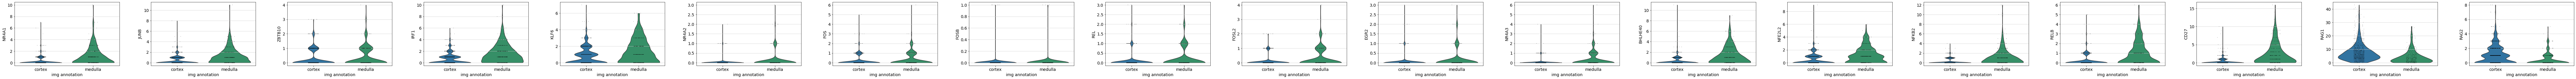

In [137]:
sc.pl.violin(adata, keys = genes+['CD27','RAG1','RAG2'], groupby='img_annotation', save = dataset+'.pdf')

In [138]:
df = pd.DataFrame(index=genes+['CD27','RAG1','RAG2'], columns = ['mean_cortex_'+dataset,'mean_medulla_'+dataset,'medulla_high_'+dataset, 'ransums_pval_'+dataset])
for gene in df.index: 
    x = adata[adata.obs['img_annotation']=='cortex',gene].X
    y = adata[adata.obs['img_annotation']=='medulla',gene].X
    
    df.loc[gene,'mean_cortex_'+dataset] = np.mean(x)
    df.loc[gene,'mean_medulla_'+dataset] = np.mean(y)
    if np.mean(y) > np.mean(x): 
        df.loc[gene,'medulla_high_'+dataset] = True
    else: 
        df.loc[gene,'medulla_high_'+dataset] = False
    
    # perform wilcoxon ranksum test
    df.loc[gene,'ransums_pval_'+dataset] = scipy.stats.ranksums(np.array(x.todense()).flatten(),np.array(y.todense()).flatten())[1]

In [139]:
df_tot = pd.concat([df_tot, df],axis=1)

In [140]:
df_tot

,mean_cortex_slide 1,mean_medulla_slide 1,medulla_high_slide 1,ransums_pval_slide 1,mean_cortex_slide 2,mean_medulla_slide 2,medulla_high_slide 2,ransums_pval_slide 2,mean_cortex_slide 3,mean_medulla_slide 3,medulla_high_slide 3,ransums_pval_slide 3
NR4A1,0.246407,0.581301,True,1.5407e-05,0.694649,2.71549,True,9.30595e-52,0.23159,1.09756,True,1.53236e-22
JUNB,0.410678,0.865854,True,1.73889e-10,0.894834,2.04789,True,1.21525e-30,0.427962,1.18467,True,2.16789e-18
ZBTB10,0.301848,0.373984,True,0.275082,0.345941,0.6,True,4.42373e-06,0.283885,0.369338,True,0.137373
IRF1,0.652977,1.0935,True,1.8153e-07,1.16328,3.44507,True,8.5762e-66,0.643543,1.4878,True,1.22287e-17
KLF6,0.61191,0.904472,True,0.000526698,1.0452,1.73521,True,3.93896e-16,0.775881,1.34843,True,1.5145e-08
NR4A2,0.0513347,0.0955285,True,0.377967,0.0765683,0.346479,True,8.9953e-10,0.022412,0.10453,True,0.0904533
FOS,0.234086,0.481707,True,0.00247001,0.467712,0.946479,True,7.8498e-11,0.210245,0.334495,True,0.0267725
FOSB,0.026694,0.0345528,True,0.873463,0.0267528,0.0338028,True,0.88295,0.00747065,0.010453,True,0.938994
REL,0.0882957,0.132114,True,0.307193,0.0811808,0.216901,True,0.000390631,0.0885806,0.222997,True,0.00566457
FOSL2,0.156058,0.313008,True,0.00131337,0.321033,0.850704,True,8.56515e-18,0.101387,0.320557,True,2.21136e-05


In [141]:
df_tot.to_csv(fig_path+'fetal_thymus_Visium.csv')